## Team 8 Extreme Value Analysis

© Explore Data Science Academy

We {TEAM 8}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.

## Meet the members

- Patrick Busaka
- David Jeremiah
- Tutis Denis
- Mohamed Abubakar
- Vanessa Manyangrirwa

###  <a name='Tableofcontent'></a>Table of content<!-- vscode-markdown-toc -->

<!-- /vscode-markdown-toc --><!-- vscode-markdown-toc -->
 1. [Introduction](#Introduction)
 2. [EDA](#EDA)
 3. [Stationarity Tests](#EDA)
 4. [Extreme Value Analysis](#EVA)
 5. [Diagnostic Plots](#Diagnostic)
 6. [Conclusion](#Example)
 7. [Reference](#About)


## Introduction

A third of Africa's population currently resides in drought-prone areas, and climate change is projected to place an additional 80 million people (approximately twice the population of California) at risk of hunger by 2080 (Matimolane, 2018). Temperature extremes are considered the most impactful climate events and have been the focus of extensive research over recent decades. Beyond ongoing discussions about climate change, it is increasingly evident that many regions in Africa are already experiencing the devastating effects of erratic weather patterns linked to regional climatic changes (De Haan & Ferreira, 2007). These challenges are expected to impose unprecedented pressures on African economies, which are heavily reliant on rain-fed agriculture.

Variations in the frequency and intensity of extreme weather events have profound impacts on human societies and their environments (Kunkel et al., 1999). Extreme events not only result in property damage, injury, hunger, and loss of life, but they also pose threats to the survival of some species and drive more significant changes in natural and human systems compared to average climate conditions. The effects of extreme climate change and variability disproportionately affect vulnerable populations, particularly the poor, as demonstrated by the recurrent droughts and floods in the Great Horn of Africa region (Lyon & DeWitt, 2012).

Analyzing changes in extreme climate events is critical due to the potentially severe social, economic, and environmental impacts of such events.


### Extreme Value Theory

Extreme Value Theory (EVT) is a branch of statistics that focuses on the asymptotic behavior of extreme events. It has diverse applications across fields such as meteorology, hydrology, ecological disturbances, and finance. The primary objective of EVT is to characterize rare events and the tails of distributions. Modeling yearly extreme temperatures is particularly important, as the economies of many African nations are heavily dependent on agriculture. The rising temperatures driven by climate change pose significant challenges and opportunities for these nations.

To support efficient decision-making, planning, and mitigation efforts, it is essential for economic planners, climatologists, meteorologists, and policymakers to understand severe temperature patterns and predict future behaviors. The study of extreme temperatures in Africa will provide stakeholders with valuable insights into the trends and behaviors of these events.

With this information, relevant authorities can take proactive steps to prepare communities for the potential impacts of weather changes caused by extreme temperatures. The aim of this research is to quantify and analyze the behavior of extreme temperatures in Africa's hottest regions, offering critical data for climate adaptation and resilience strategies.


### Description of Data

The dataset contains average temperature records for countries in Africa, focusing on maximum temperatures for each of the twelve months of the year. The data spans the period from 1995 to 2019, with an emphasis on countries experiencing highly variable weather patterns, particularly those in the Horn of Africa. Extreme value analysis is performed using the method of maximum likelihood estimation (MLE), by fitting both the Generalized Extreme Value (GEV) distribution and the Generalized Pareto Distribution (GPD).


## Load Dependencies

In [5]:
!pip install pymannkendall
!pip install pyextremes



In [ ]:
!pip install --upgrade pyextremes


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime

import pyextremes
import pymannkendall as mk
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

from pyextremes import (
    EVA,
    get_extremes,
    get_return_periods,
    plot_mean_residual_life,
    plot_parameter_stability,
    plot_return_value_stability,
    plot_threshold_stability,
)

print("Imports successful!")


Imports successful!


### Import Dataset

In [55]:
df = pd.read_csv('africa_temperature.csv')

In [15]:
def dataset_summary(df, target_column):
    """Displays an overview of a dataset, including preview, shape, nulls, and statistics."""
    print("Dataset Preview:")
    print(df.head())

    print("\nShape of Dataset:")
    print(df.shape)

    print("\nColumns Containing Nulls:")
    print(df.info())

    print(f"\nStatistics for '{target_column}':")
    print(df[target_column].describe())

# Usage
dataset_summary(df, 'AverageTemperature')


Dataset Preview:
   Unnamed: 0  Region  Country     City  Month  Day  Year  AverageTemperature
0           0  Africa  Algeria  Algiers      1    1  1995           17.888889
1           1  Africa  Algeria  Algiers      1    2  1995            9.666667
2           2  Africa  Algeria  Algiers      1    3  1995            9.333333
3           3  Africa  Algeria  Algiers      1    4  1995            8.000000
4           4  Africa  Algeria  Algiers      1    5  1995            8.833333

Shape of Dataset:
(217714, 8)

Columns Containing Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217714 entries, 0 to 217713
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          217714 non-null  int64  
 1   Region              217714 non-null  object 
 2   Country             217714 non-null  object 
 3   City                217714 non-null  object 
 4   Month               217714 non-null  int64

### Dataset Summary and Insights

#### Dataset Overview:
The dataset contains temperature data from various regions in Africa, with detailed information about countries, cities, and daily temperature measurements over a specified period.

#### Key Points:
1. **Dataset Preview**:
   - The dataset includes 8 columns: `Unnamed: 0`, `Region`, `Country`, `City`, `Month`, `Day`, `Year`, and `AverageTemperature`.
   - Sample data indicates daily average temperatures recorded across different locations and dates.

2. **Shape of Dataset**:
   - The dataset consists of **217,714 rows** and **8 columns**, highlighting a substantial amount of data for analysis.

3. **Columns Containing Nulls**:
   - All columns are complete, with no missing values in any of the 217,714 rows.
   - Data types include integers (`int64`), floating-point numbers (`float64`), and strings (`object`).

4. **Memory Usage**:
   - The dataset occupies approximately **13.3 MB** of memory, which is efficient for handling in-memory operations.

5. **Statistics for `AverageTemperature`**:
   - **Count**: All 217,714 rows have valid temperature data.
   - **Mean Temperature**: The average temperature is **23.55°C**, indicating warm conditions overall.
   - **Standard Deviation**: A standard deviation of **5.14°C** suggests moderate variation in temperatures.
   - **Minimum Temperature**: The lowest recorded temperature is **0.72°C**, highlighting extreme cold instances.
   - **Maximum Temperature**: The highest recorded temperature is **39.33°C**, reflecting extreme heat.
   - **Percentiles**:
     - **25% (First Quartile)**: 20.33°C
     - **50% (Median)**: 24.89°C
     - **75% (Third Quartile)**: 27.39°C
   - The interquartile range (IQR) suggests that the majority of temperatures fall between **20.33°C and 27.39°C**, indicating a predominantly warm climate.

#### Key Insights:
- The dataset is clean and complete, with no missing values, making it well-suited for further analysis.
- The temperatures span a wide range, from **0.72°C** to **39.33°C**, showcasing the diversity of climate conditions in Africa.
- The high mean temperature (**23.55°C**) aligns with Africa's predominantly warm climate.
- Variations in temperature are significant, with some regions experiencing extreme cold and heat.

These insights provide a solid foundation for exploring temperature trends and their implications for climate studies in Africa.


## EDA

<ipython-input-16-5b79fd87bd62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='AverageTemperature', palette="coolwarm", width=0.5)


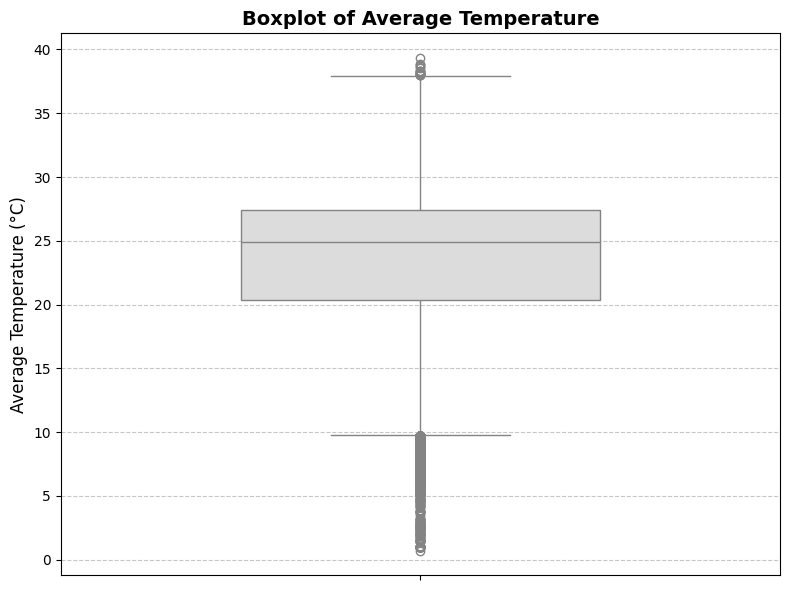

In [16]:
# Boxplot to visualize outliers
plt.figure(figsize=(8, 6))  # Adjust the size for better proportions
sns.boxplot(data=df, y='AverageTemperature', palette="coolwarm", width=0.5)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Title and labels
plt.title("Boxplot of Average Temperature", fontsize=14, fontweight='bold')
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.xlabel("")  # Remove x-axis label as it's not necessary for this plot

# Enhance tick parameters
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


### Analysis of the Boxplot: Average Temperature

#### **Observations**
1. **Median and Quartiles**:
   - The median temperature (line inside the box) is approximately **25°C**, indicating that half of the recorded temperatures are below this value.
   - The interquartile range (IQR) spans from around **20°C to 27°C**, capturing the middle 50% of the temperature distribution.

2. **Outliers**:
   - Significant outliers are visible:
     - On the lower end, temperatures below **10°C** are outliers, representing unusually cold days.
     - On the upper end, temperatures exceeding **35°C** are outliers, indicating extreme heat events.

3. **Range**:
   - The overall range of temperatures extends from approximately **1°C** to **39°C**.
   - The whiskers show most temperatures fall between **10°C and 35°C**, with values outside this range classified as extreme.

4. **Skewness**:
   - The boxplot appears slightly skewed towards the lower end, indicating that unusually cold temperatures occur more frequently than extreme heat events.

---

#### **Interpretation with Extreme Value Analysis (EVA)**
Extreme Value Analysis is particularly relevant to:
1. **Outlier Temperatures**:
   - Both unusually cold and hot temperatures represent extremes that can significantly impact agriculture, ecosystems, and regional climates.
   - EVA will help model these extremes to determine their frequency and predict the likelihood of similar events in the future.

2. **Applications**:
   - EVA can quantify the probability of extreme temperature events (e.g., temperatures above 35°C or below 10°C).
   - This insight is critical for climate adaptation strategies, such as agricultural planning, water resource management, and policy-making.

---

#### **Key Takeaways**
- The dataset demonstrates notable variability in temperatures, with significant outliers on both ends of the spectrum.
- Extreme Value Analysis is the appropriate tool to model and understand these extremes, providing actionable insights for stakeholders.


In [ ]:
# df = df[(df['AverageTemperature']>10) & (df['AverageTemperature']<37)]

In [18]:
# Group average temperature by year to visualize trends
data = df[['Year', 'AverageTemperature']].groupby('Year').mean()

# Calculate linear fit for trendline
linfit = np.polyfit(data.index, data['AverageTemperature'], deg=1)
linear_fit = linfit[0] * data.index + linfit[1]

# Create plot with enhanced visuals
fig = px.line(
    data,
    x=data.index,
    y='AverageTemperature',
    title='Average Temperature Trends in Africa (1995–2019)',
    labels={'x': 'Year', 'AverageTemperature': 'Average Temperature (°C)'},
    template='plotly_white'
)

# Add trendline to the plot
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=linear_fit,
        mode='lines',
        name='Linear Trend',
        line=dict(color='red', dash='dash')
    )
)

# Customize layout for better insights
fig.update_layout(
    title_font_size=18,
    xaxis_title='Year',
    yaxis_title='Average Temperature (°C)',
    legend=dict(title='Legend', orientation='h', x=0.5, xanchor='center', y=-0.2),
    margin=dict(l=40, r=40, t=60, b=40),
    font=dict(size=12)
)

fig.show()


### Insights from the Plot: Average Temperature Trends in Africa (1995–2019)

1. **General Trend**:
   - The linear trendline (red dashed line) indicates a gradual increase in the average temperature of Africa over the years, highlighting the effects of climate change.

2. **Yearly Variability**:
   - The blue line shows significant interannual fluctuations, with peaks and dips indicating periods of higher or lower-than-average temperatures.

3. **Notable Periods**:
   - Between 2000 and 2010, the average temperature experienced larger variability, with sharp increases followed by noticeable drops.
   - Post-2010, the temperature stabilized with a consistent upward trend, culminating in a notable rise by 2019.

4. **Implication**:
   - The increasing trend underscores the need for climate adaptation strategies, especially in regions where rising temperatures can exacerbate socio-economic and environmental challenges.


In [ ]:
# countries that make up the dataset
df.Country.unique()

array(['Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo',
       'Egypt', 'Ethiopia', 'Gabon', 'Gambia', 'Guinea', 'Guinea-Bissau',
       'Ivory Coast', 'Kenya', 'Morocco', 'Madagascar', 'Mauritania',
       'Malawi', 'Mozambique', 'Namibia', 'Nigeria', 'Senegal',
       'Sierra Leone', 'South Africa', 'Togo', 'Tunisia', 'Tanzania',
       'Uganda', 'Zambia'], dtype=object)

In [22]:
# Extract the country with the highest and lowest temperatures
highest_temp = df.loc[df['AverageTemperature'].idxmax()]
lowest_temp = df.loc[df['AverageTemperature'].idxmin()]

# Display results in a clear and concise format
print("### Country with the Highest Temperature")
print(f"Country: {highest_temp['Country']}, City: {highest_temp['City']}")
print(f"Date: {highest_temp['Year']}-{highest_temp['Month']}-{highest_temp['Day']}")
print(f"Temperature: {highest_temp['AverageTemperature']:.2f}°C\n")

print("### Country with the Lowest Temperature")
print(f"Country: {lowest_temp['Country']}, City: {lowest_temp['City']}")
print(f"Date: {lowest_temp['Year']}-{lowest_temp['Month']}-{lowest_temp['Day']}")
print(f"Temperature: {lowest_temp['AverageTemperature']:.2f}°C")


### Country with the Highest Temperature
Country: Nigeria, City: Niamey
Date: 1998-4-18
Temperature: 39.33°C

### Country with the Lowest Temperature
Country: Algeria, City: Algiers
Date: 2005-1-27
Temperature: 0.72°C


### Insights: Countries with Extreme Temperatures

#### **Country with the Highest Temperature**
- **Country**: Nigeria
- **City**: Niamey
- **Date**: April 18, 1998
- **Temperature**: **39.33°C**

The highest recorded temperature in the dataset occurred in Nigeria's city of Niamey, reaching an extreme **39.33°C**. This highlights the presence of exceptionally hot conditions in West Africa, particularly during the dry season, when temperatures can soar to such extremes. These conditions are typical for regions in the Sahel zone, which experiences intense heat due to its proximity to the Sahara Desert.

#### **Country with the Lowest Temperature**
- **Country**: Algeria
- **City**: Algiers
- **Date**: January 27, 2005
- **Temperature**: **0.72°C**

The lowest recorded temperature occurred in Algiers, Algeria, at **0.72°C**. This temperature, while rare for Africa, reflects the effects of winter in North African countries. Algeria's climate is influenced by the Mediterranean and the Atlas Mountains, which can result in colder-than-usual conditions during the winter months, particularly in elevated or northern regions.

---

#### **Key Insights**
- The wide temperature range (**0.72°C to 39.33°C**) underscores the climatic diversity across Africa, driven by geographic and seasonal variations.
- The extremes highlight the importance of understanding localized climate patterns, especially for agriculture, infrastructure planning, and climate adaptation strategies.


Top 5 coldest and hottest countries overall

In [31]:
# Calculate the average temperature per country and sort the data
data = df[['Country', 'AverageTemperature']].groupby('Country').mean()

# Extract the top 5 coldest and hottest countries
coldest_countries = data.nsmallest(5, 'AverageTemperature')
hottest_countries = data.nlargest(5, 'AverageTemperature')

# Print results
print("Top 5 Coldest Countries in Africa:")
print(coldest_countries)

print("\nTop 5 Hottest Countries in Africa:")
print(hottest_countries)


Top 5 Coldest Countries in Africa:
              AverageTemperature
Country                         
South Africa                19.3
Ethiopia                    20.2
Kenya                       21.7
Algeria                     22.1
Tanzania                    23.0

Top 5 Hottest Countries in Africa:
         AverageTemperature
Country                    
Sudan                  29.3
Nigeria                28.5
Ghana                  27.6
Egypt                  24.8
Morocco                23.5


### Insights: Top 5 Coldest and Hottest Countries in Africa

#### **Top 5 Coldest Countries in Africa**
1. **South Africa**: Average temperature of **19.3°C**. This reflects the influence of its southern latitude and elevation, particularly in areas like the Drakensberg Mountains.
2. **Ethiopia**: Average temperature of **20.2°C**. The country's cooler temperatures are attributed to its highlands, which experience milder climates compared to its lowlands.
3. **Kenya**: Average temperature of **21.7°C**. Kenya's cooler regions, like the Central Highlands and Mount Kenya, contribute to its lower average temperatures.
4. **Algeria**: Average temperature of **22.1°C**. The northern part of Algeria, influenced by the Mediterranean climate, tends to be cooler compared to the southern desert areas.
5. **Tanzania**: Average temperature of **23.0°C**. Cooler temperatures are more prevalent in high-altitude regions such as Mount Kilimanjaro and the Northern Highlands.

#### **Top 5 Hottest Countries in Africa**
1. **Sudan**: Average temperature of **29.3°C**. This reflects Sudan’s arid climate, with scorching temperatures common in the Sahara and Sahel regions.
2. **Nigeria**: Average temperature of **28.5°C**. The country experiences tropical climates, particularly in the northern arid zones, contributing to its high average temperatures.
3. **Ghana**: Average temperature of **27.6°C**. Located in West Africa, Ghana experiences consistently warm temperatures due to its proximity to the equator.
4. **Egypt**: Average temperature of **24.8°C**. The arid desert climate dominates much of Egypt, particularly in areas away from the Mediterranean coast.
5. **Morocco**: Average temperature of **23.5°C**. While the Atlas Mountains can be cooler, the country’s desert regions push up the overall average temperature.

---

### Key Observations:
- **Temperature Range**:
  - The average temperatures of the coldest countries (19.3°C to 23.0°C) reflect the influence of high altitudes and temperate climates in specific regions.
  - The hottest countries (23.5°C to 29.3°C) are predominantly located in arid or tropical zones.

- **Geographical Influence**:
  - Countries with significant elevation (e.g., South Africa, Ethiopia, Kenya) experience cooler climates.
  - Nations located in arid regions, such as Sudan and Nigeria, face some of the highest temperatures in Africa.

- **Climate Diversity**:
  - Africa's diverse climates, ranging from tropical rainforests to arid deserts and high-altitude regions, contribute to the continent’s wide temperature variation.


#### Let's analyse temperature data for the country that experiences the highest average temperature

In [41]:
df.head()

,Country,AverageTemperature
0,Nigeria,28.5
1,Algeria,22.1
2,South Africa,19.3
3,Egypt,24.8
4,Kenya,21.7


In [44]:
def categorize_temp(temp):
    if temp > 25:
        return 'Hot'
    elif 20 <= temp <= 25:
        return 'Warm'
    else:
        return 'Cool'

df['Category'] = df['AverageTemperature'].apply(categorize_temp)
print(df.groupby('Category').size())


Category
Cool    1
Hot     3
Warm    6
dtype: int64


In [48]:
category_distribution = df['Category'].value_counts(normalize=True) * 100
print(category_distribution)


Category
Warm    60.0
Hot     30.0
Cool    10.0
Name: proportion, dtype: float64


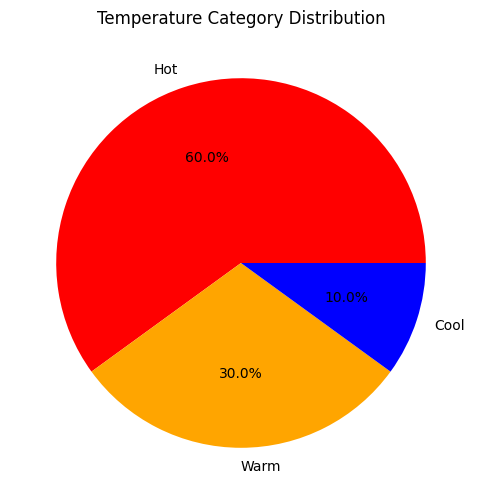

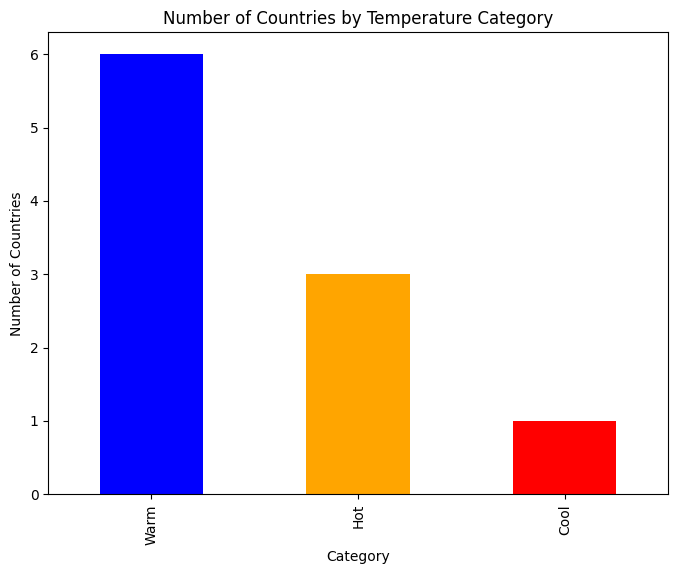

In [49]:
import matplotlib.pyplot as plt

# Pie Chart
plt.figure(figsize=(8, 6))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'orange', 'blue'], labels=['Hot', 'Warm', 'Cool'])
plt.title('Temperature Category Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()

# Bar Plot
plt.figure(figsize=(8, 6))
df['Category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title('Number of Countries by Temperature Category')
plt.xlabel('Category')
plt.ylabel('Number of Countries')
plt.show()


### Insights: Temperature Category Distribution

#### **Overview**
- The pie chart displays the distribution of countries across three temperature categories: **Hot**, **Warm**, and **Cool**.

#### **Key Observations**
1. **Hot Category**:
   - Constitutes the majority, accounting for **60%** of countries.
   - Reflects that most countries in Africa experience average temperatures above 25°C, consistent with its tropical and desert climates.

2. **Warm Category**:
   - Represents **30%** of countries.
   - Indicates a significant portion of countries with moderate average temperatures (20°C to 25°C), likely influenced by high-altitude regions and coastal climates.

3. **Cool Category**:
   - Comprises only **10%** of countries.
   - Demonstrates that few African countries have average temperatures below 20°C, usually in areas with high elevation or influenced by Mediterranean climates.

#### **Implications**
- The dominance of "Hot" countries underscores the need for climate adaptation strategies tailored to high-temperature conditions, especially for agriculture and water management.
- "Warm" and "Cool" countries may have more stable climates, providing opportunities for diverse agricultural practices and sustainable resource management.


In [50]:
category_stats = df.groupby('Category')['AverageTemperature'].agg(['mean', 'std', 'min', 'max'])
print(category_stats)


               mean       std   min   max
Category                                 
Cool      19.300000       NaN  19.3  19.3
Hot       28.466667  0.850490  27.6  29.3
Warm      22.550000  1.588395  20.2  24.8


In [51]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='Category',
    color_discrete_map={'Hot': 'red', 'Warm': 'orange', 'Cool': 'blue'},
    title='Geographical Distribution of Temperature Categories'
)
fig.show()


### Insights: Geographical Distribution of Temperature Categories

#### **Overview**
The map visualizes the geographical distribution of African countries based on their temperature categories: **Hot**, **Warm**, and **Cool**.

#### **Key Observations**
1. **Hot Category (Red)**:
   - Dominates the northern and central regions of Africa.
   - Countries like Sudan and Nigeria fall into this category, representing the arid and tropical climates.
   - This aligns with the desert zones (e.g., Sahara) and areas near the equator, which experience consistently high temperatures.

2. **Warm Category (Orange)**:
   - Found predominantly in regions with transitional climates.
   - Countries like Algeria and Kenya belong to this category, where temperatures are moderated by elevation, coastal influence, or Mediterranean climates.
   - Warm regions form a buffer zone between the hot tropical/desert areas and cooler regions.

3. **Cool Category (Blue)**:
   - Limited to the southernmost regions of Africa.
   - South Africa is the primary representation of this category, attributed to its higher altitude and temperate climate influenced by the surrounding oceans.

#### **Geographical Implications**
- **Hot Regions**:
  - These areas are highly vulnerable to climate change impacts, such as desertification, extreme heatwaves, and water scarcity.
  - Adaptation strategies should focus on mitigating heat-related risks for agriculture and water resource management.

- **Warm Regions**:
  - Represent a transitional zone with diverse climates. These areas may provide opportunities for diverse agricultural practices.
  - However, they could face temperature increases due to climate change, potentially shifting into the "Hot" category over time.

- **Cool Regions**:
  - The rarity of "Cool" regions in Africa highlights the unique nature of temperate climates in the continent.
  - These areas are less likely to face extreme heat impacts but may still experience temperature variability affecting local ecosystems.

#### **Conclusion**
The geographical distribution emphasizes Africa's climatic diversity, with a majority of countries experiencing high average temperatures (Hot category). The map provides a clear visual representation of how temperatures vary across the continent and highlights the need for climate-resilient planning tailored to each region's unique conditions.


## Stationarity  

Stationarity is a fundamental concept in time series analysis. In simple terms, a stationary time series has statistical properties—such as mean, variance, and autocorrelation—that remain constant over time. A stationary time series does not exhibit trends or seasonal patterns, making it easier to model and analyze. Additionally, many time series modeling techniques rely on the assumption of stationarity for accurate results.

To test for stationarity in our data, we will use the **Dickey-Fuller test**. This test provides critical values and a p-value, which help us determine whether to accept or reject the null hypothesis. The null hypothesis states that the data is **non-stationary**. If the p-value is sufficiently low, we reject the null hypothesis and accept the alternative hypothesis, indicating that the data is stationary.

Stationarity is crucial because it allows us to measure how current values depend on past values. If the data is non-stationary, changes in present values will not significantly impact past values, which could undermine the effectiveness of time series models.


In [57]:
df.head()

,Unnamed: 0,Region,Country,City,Month,Day,Year,AverageTemperature
0,0,Africa,Algeria,Algiers,1,1,1995,17.888889
1,1,Africa,Algeria,Algiers,1,2,1995,9.666667
2,2,Africa,Algeria,Algiers,1,3,1995,9.333333
3,3,Africa,Algeria,Algiers,1,4,1995,8.000000
4,4,Africa,Algeria,Algiers,1,5,1995,8.833333


In [ ]:
df_nigeria = nigeria.copy()
df_congo = congo.copy()
df_gabon = gabon.copy()

### Augmented Dickey-Fuller Test

The Augmented Dickey-Fuller Test (ADF) is a stationarity unit root test. The ADF test is a modified version of the Dickey Fuller exam. In the time series analysis, unit-roots might produce unexpected findings.

The following are the test hypotheses:

- Null hypothesis (H0): The time series data is non-stationary.
- Alternate hypothesis (H1): The time series is stationary (or trend-stationary)

In [38]:
# define function for ADF test

def adf_test(data):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(data, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



In [ ]:
print('------------------------------------------------------------')
print('Nigeria')
adf_nigeria = adf_test(df_nigeria)
print('------------------------------------------------------------')
print('Congo')
adf_congo = adf_test(df_congo)
print('------------------------------------------------------------')
print('Gabon')
adf_gabon = adf_test(df_gabon)
print('------------------------------------------------------------')

We can see that the temperature data for Congo is stationary from the fact that our p-value is less than 5 percent and the test statistic is less than the critical value.

### Kwiatkowski Phillips Schmidt Shin (KPSS) test

The Kwiatkowski Phillips Schmidt Shin (KPSS) test determines if a time series is stationary around a mean or linear trend, or non-stationary as a result of a unit root. A stationary time series has statistical features such as mean and variance that remain constant across time.

The following are the test hypotheses:

- Null hypothesis (H0): The data is stationary.
- Alternate hypothesis (H1): The data is not stationary.

In [ ]:
#define function for kpss test

def kpss_test(data):
    print ('Results of KPSS Test:')
    kpsstest = kpss(data, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

In [ ]:
print('------------------------------------------------------------')
print("Nigeria")
kpss_nigeria = kpss_test(df_nigeria)
print('------------------------------------------------------------')
print("Gabon")
kpss_congo = kpss_test(df_gabon)
print('------------------------------------------------------------')
print("Congo")
kpss_gabon = kpss_test(df_congo)
print('------------------------------------------------------------')

------------------------------------------------------------
Nigeria
Results of KPSS Test:
Test Statistic            0.07048
p-value                   0.10000
Lags Used                55.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64
------------------------------------------------------------
Gabon
Results of KPSS Test:
Test Statistic            0.159215
p-value                   0.100000
Lags Used                54.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------
Congo
Results of KPSS Test:
Test Statistic            0.088936
p-value                   0.100000
Lags Used                53.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical

c:\Users\Mohamed Abubakar\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


c:\Users\Mohamed Abubakar\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


c:\Users\Mohamed Abubakar\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




#### Mann Kendall Test for Trend Detection

The Mann-Kendall Trend Test is used to determine whether or not a trend exists in time series data. It is a non-parametric test, meaning there is no underlying assumption made about the normality of the data.

The hypotheses for the test are as follows:

- H0 (null hypothesis): There is no trend present in the data.

- HA (alternative hypothesis): A trend is present in the data. (This could be a positive or negative trend)

If the p-value of the test is lower than some significance level (common choices are 0.10, 0.05, and 0.01), then there is statistically significant evidence that a trend is present in the time series data.

In [ ]:
print('Nigeria')
print(mk.original_test(df_nigeria, alpha=0.05))
print('------------------------------------------------------------')
print('Congo')
print(mk.original_test(df_congo, alpha=0.05))
print('------------------------------------------------------------')
print('Gabon')
print(mk.original_test(df_gabon, alpha=0.05))

Nigeria
Mann_Kendall_Test(trend='increasing', h=True, p=3.533448413040041e-05, z=4.136043757466535, Tau=0.029205559692036517, s=1160979.0, var_s=78791202881.66667, slope=6.622955162593455e-05, intercept=29.760304214407142)
------------------------------------------------------------
Congo
Mann_Kendall_Test(trend='increasing', h=True, p=8.435714606380706e-05, z=3.931671895149451, Tau=0.02823565483800022, s=1048895.0, var_s=71171917416.33333, slope=2.8308563340408563e-05, intercept=25.711337579617844)
------------------------------------------------------------
Gabon
Mann_Kendall_Test(trend='increasing', h=True, p=6.236282423799366e-08, z=5.411890492979904, Tau=0.038860215506841614, s=1444245.0, var_s=71216912799.66667, slope=3.022609116189132e-05, intercept=26.425265989602224)


From this result, we can say that there is a significant trend in this dataset. Because the p-value is smaller than alpha=0.05 so h=True. The trend is “increasing” and the value of trend/slope is 6.79e-0.5. . If the P-value is less than 0.05, a trend is considered significant at 5% level of significance. We can conclude that the trend is not significant.

#### Converting non-stationary to stationary

To detrend the time series data there are certain transformation techniques used and they are listed as follows.

- Log transforming of the data
- Taking the square root of the data
- Taking the cube root
- Proportional change

For this project we will be using the square root transformation

In [ ]:
# df_log=np.sqrt(df_nigeria['AverageTemperature'])
# df_diff=df_log.diff().dropna()

In [ ]:
# print('Nigeria')
# adf_nigeria = adf_test(df_diff)

### Extreme Value Analysis

In [ ]:
def evt_squeeze(data):
    data = data.squeeze()
    model = EVA(data=data)
    model
    return model

In [ ]:
model_congo = evt_squeeze(df_congo)
model_nigeria = evt_squeeze(df_nigeria)
model_gabon = evt_squeeze(df_gabon)

#### Extract High extreme values

Having the EVA object initialized, we are ready to perform the first step of the analysis - extreme value extraction. We will use the Block Maxima (BM) extraction method with a block size of 1 year. What this means in the framework of the model is that the data is split into one-year blocks and within each of the blocks the highest value is found and added to the extremes series. Let's extract the extreme values using this method:

#### Block Maxima Method

In [ ]:
model_congo.get_extremes(
    method="BM", ## or POT
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",
)
model_congo

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:            AverageTemperature      Size:                               8,620
Start:                       January 1995      End:                        December 2019
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 25      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

Detailed description of parameters passed to the get_extremes method are provided in the docstrings:

In [ ]:
model_nigeria.get_extremes(
    method="BM", ## or POT
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",
)
model_nigeria

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:            AverageTemperature      Size:                               8,917
Start:                       January 1995      End:                        December 2019
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 25      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

In [ ]:
model_gabon.get_extremes(
    method="BM", ## or POT
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",
)
model_gabon

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:            AverageTemperature      Size:                               8,622
Start:                       January 1995      End:                        December 2019
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 25      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

In [ ]:
help(EVA.get_extremes)

Help on function get_extremes in module pyextremes.eva:

get_extremes(self, method: str, extremes_type: str = 'high', **kwargs) -> None
    Get extreme events from time series.
    
    Extracts extreme values from the 'self.data' attribute.
    Stores extreme values in the 'self.extremes' attribute.
    
    Parameters
    ----------
    method : str
        Extreme value extraction method.
        Supported values:
            BM - Block Maxima
            POT - Peaks Over Threshold
    extremes_type : str, optional
        high (default) - get extreme high values
        low - get extreme low values
    kwargs
        if method is BM:
            block_size : str or pandas.Timedelta, optional
                Block size (default='365.2425D').
                See pandas.to_timedelta for more information.
            errors : str, optional
                raise (default) - raise an exception
                    when encountering a block with no data
                ignore - ignore bloc

A great way to visually asses the extracted extreme values is to plot them against the original time series. This can be done using the plot_extremes method. In the case of Block Maxima extraction method, block boundaries are shown.

In [ ]:
def plot_function(model):
    return model.plot_extremes()

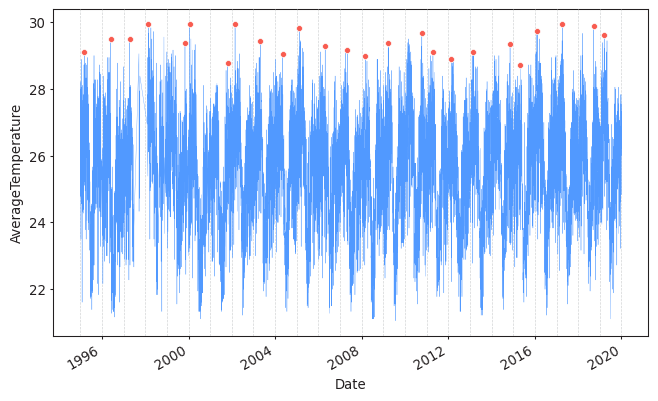

In [ ]:
congo_plot = plot_function(model_congo)

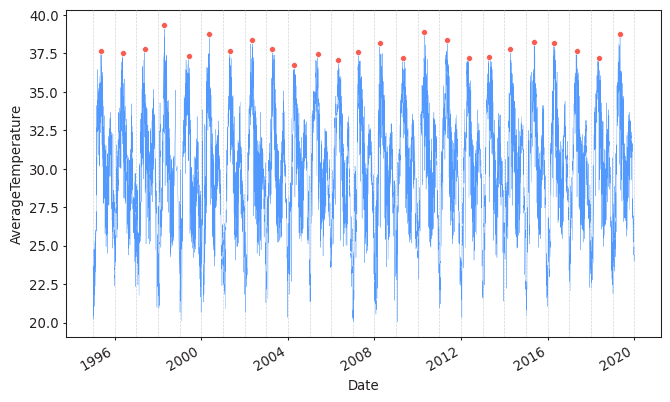

In [ ]:
nigeria_plot = plot_function(model_nigeria)

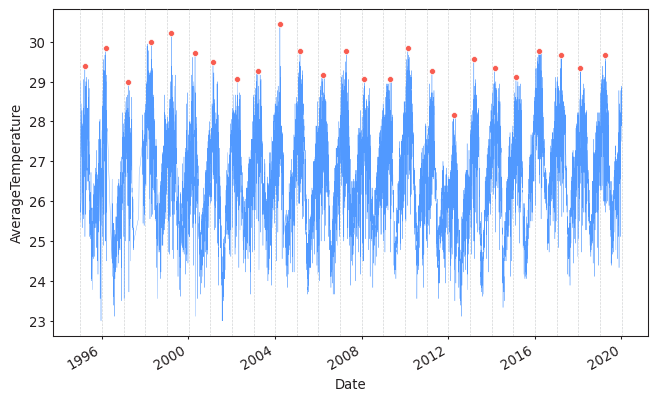

In [ ]:
nigeria_plot = plot_function(model_gabon)

### Fit a model

The next step of the analysis is fitting a model to the extracted extreme values. Two fitting models are available: MLE (maximum likelihood) and Emcee (Markov Chain Monte Carlo). The default MLE model is used. It's a simple model which finds a point estimate of distribution parameters and calculates confidence intervals using bootstrap monte carlo. The two key parameters required by a model are: model - a model name, and distribution - distribution name, compliant with scipy.stats distribution names. By default the model select best distribution using the Akaike Information Criterion (AIC). For Block Maxima this selection is performed between GEV (Generalized Extreme Value) and Gumbel distributions.

In [ ]:
def fitting_model(model):
    return model.fit_model()


In [ ]:
# model_nigeria.fit_model()
# model_gabon.fit_model()
# model_congo.fit_model()

In [ ]:
print(model_nigeria)

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:            AverageTemperature      Size:                               8,917
Start:                       January 1995      End:                        December 2019
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 25      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

In [ ]:
print(model_congo)

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:            AverageTemperature      Size:                               8,620
Start:                       January 1995      End:                        December 2019
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 25      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

In [ ]:
print(model_gabon)

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:            AverageTemperature      Size:                               8,622
Start:                       January 1995      End:                        December 2019
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 25      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

Detailed description of parameters passed to the fit_model method are provided in the docstrings:

In [ ]:
help(model_nigeria.fit_model)

Help on method fit_model in module pyextremes.eva:

fit_model(model: str = 'MLE', distribution: Union[str, scipy.stats._distn_infrastructure.rv_continuous] = None, distribution_kwargs: Optional[dict] = None, **kwargs) -> None method of pyextremes.eva.EVA instance
    Fit a model to the extracted extreme values.
    
    Parameters
    ----------
    model : str, optional
        Name of model. By default it is 'MLE'.
        Name of model.
        Supported models:
            MLE - Maximum Likelihood Estimate (MLE) model.
                Based on 'scipy' package (scipy.stats.rv_continuous.fit).
            Emcee - Markov Chain Monte Carlo (MCMC) model.
                Based on 'emcee' package by Daniel Foreman-Mackey.
    distribution : str or scipy.stats.rv_continuous, optional
        Distribution name compatible with scipy.stats
        or a subclass of scipy.stats.rv_continuous.
        See https://docs.scipy.org/doc/scipy/reference/stats.html
        By default the distribution i

A quick way to analyze quality of the model is to use a method called plot_diagnostic. This method provides a two-by-two plot showing return values, PDF, Q-Q, and P-P plots. Let's plot it:

In [ ]:
def diagnostic_plot(model):
    return model.plot_diagnostic(alpha=0.95)

(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='AverageTemperature'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='AverageTemperature', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

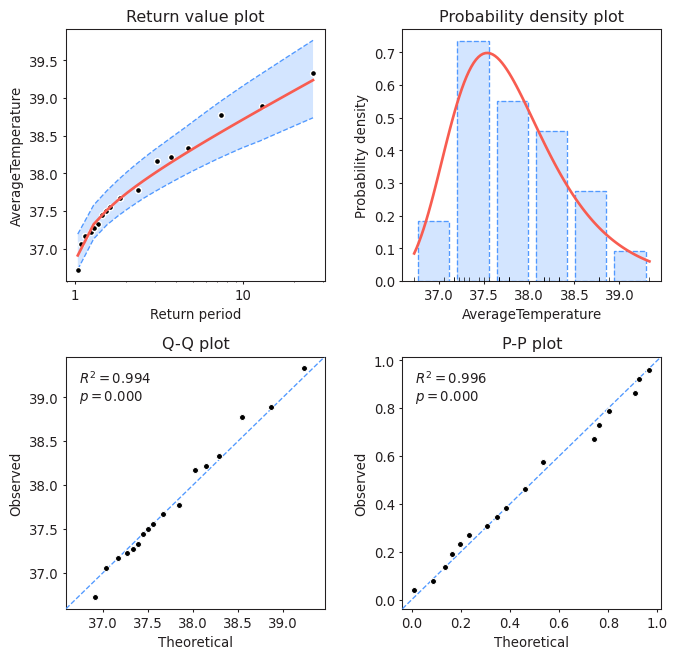

In [ ]:
diagnostic_plot(model_nigeria)

In [ ]:
print('Return temperature values for Nigeria')
summary = model_nigeria.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
summary



Return temperature values for Nigeria


c:\Users\Mohamed Abubakar\anaconda3\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning:

invalid value encountered in subtract



,return value,lower ci,upper ci
return period,,,
1.0,-inf,NaN,NaN
2.0,37.724817,37.498378,37.983870
5.0,38.321819,37.958399,38.683036
10.0,38.717086,38.258709,39.158428
25.0,39.216507,38.617229,39.775987
50.0,39.587006,38.872942,40.222284
100.0,39.954770,39.127013,40.687899
250.0,40.438990,39.471911,41.290899
500.0,40.804615,39.727773,41.733373


In [ ]:
# diagnostic_plot(model_congo)

In [ ]:
print('Return temperature values for Congo')
summary = model_congo.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
summary



Return temperature values for Congo


c:\Users\Mohamed Abubakar\anaconda3\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning:

invalid value encountered in subtract



,return value,lower ci,upper ci
return period,,,
1.0,-inf,NaN,NaN
2.0,29.678427,29.398923,29.990873
5.0,30.383253,29.929252,30.830767
10.0,30.849910,30.262985,31.397518
25.0,31.439531,30.692460,32.124114
50.0,31.876946,31.017295,32.673667
100.0,32.311131,31.330238,33.221387
250.0,32.882807,31.734047,33.937263
500.0,33.314467,32.044778,34.465349


(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='AverageTemperature'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='AverageTemperature', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

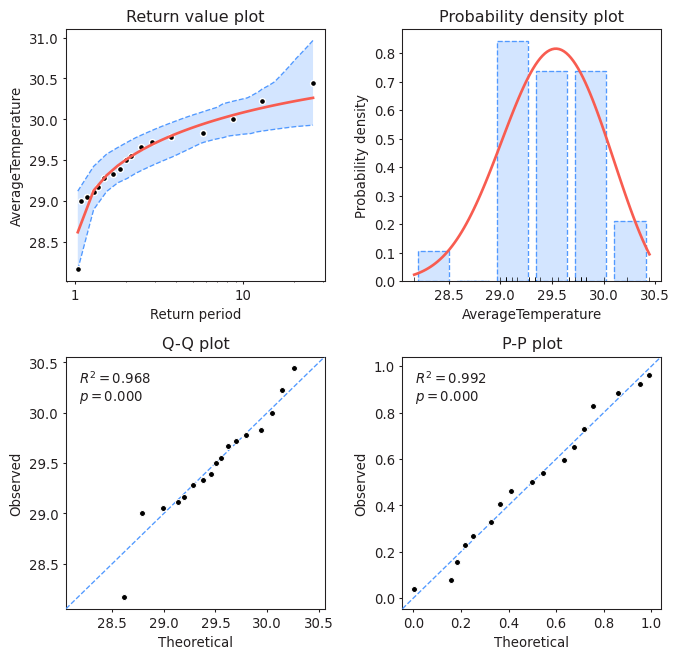

In [ ]:
diagnostic_plot(model_gabon)

In [ ]:
print('Return temperature values for Gabon')
summary = model_congo.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
summary



Return temperature values for Gabon


c:\Users\Mohamed Abubakar\anaconda3\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning:

invalid value encountered in subtract



,return value,lower ci,upper ci
return period,,,
1.0,-inf,NaN,9.626577
2.0,29.617868,29.212779,29.774505
5.0,29.858126,29.539296,29.901195
10.0,29.908676,29.709749,29.928080
25.0,29.932693,29.871433,30.138210
50.0,29.939299,29.930318,30.346846
100.0,29.942177,29.940980,30.540896
250.0,29.943674,29.943167,30.820990
500.0,29.944103,29.943842,31.026028


In [ ]:
data = df_congo.squeeze()
model_1 = EVA(data=data)
model_1

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:            AverageTemperature      Size:                               8,620
Start:                       January 1995      End:                        December 2019
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

In [ ]:
def squeeze_function(df):
    data = df.squeeze()
    model = EVA(data=data)
    return model

In [ ]:
congo_ = squeeze_function(df_congo)
congo_

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:            AverageTemperature      Size:                               8,620
Start:                       January 1995      End:                        December 2019
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

In [ ]:
nigeria_ = squeeze_function(df_nigeria)
nigeria_

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:            AverageTemperature      Size:                               8,917
Start:                       January 1995      End:                        December 2019
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

In [ ]:
extremes = nigeria_.get_extremes(
    method="POT", ## or POT
    extremes_type="high",
    threshold=30,
    r="24H",
)
nigeria_

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:            AverageTemperature      Size:                               8,917
Start:                       January 1995      End:                        December 2019
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                654      Extraction method:                    POT
Type:                                high      Threshold:                             30
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

In [ ]:
# convert dataframe to pandas time series using squeeze method for each temperature dataset

data_1 = df_nigeria.squeeze()
data_2 = df_congo.squeeze()
data_3 = df_gabon.squeeze()

POT extraction for Nigeria


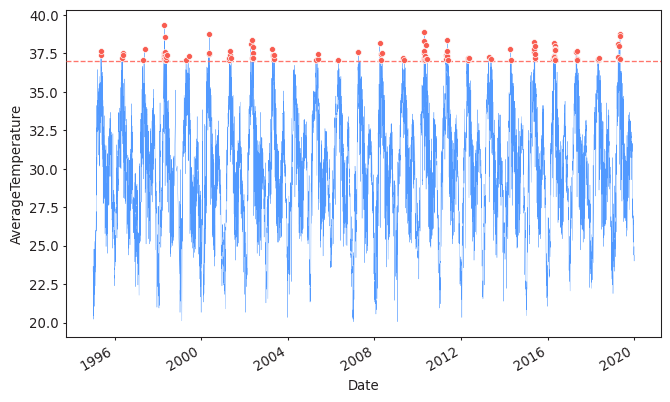

In [ ]:
# select threshold (adjusted according to plot). Not too high or too low (to extract enough extreme values)
print('POT extraction for Nigeria')

threshold = 37
r = "12H"
extremes = get_extremes(
    ts=data_1,
    method="POT",
    threshold=threshold,
    r=r,
)
fig, ax = plot_extremes(
    ts=data_1,
    extremes=extremes,
    extremes_method="POT",
    extremes_type="high",
    threshold=threshold,
    r=r,
    figsize=(8, 5),
)
fig.autofmt_xdate()
fig.savefig("pot-high-12H.png", dpi=96, bbox_inches="tight")

POT extraction for Congo


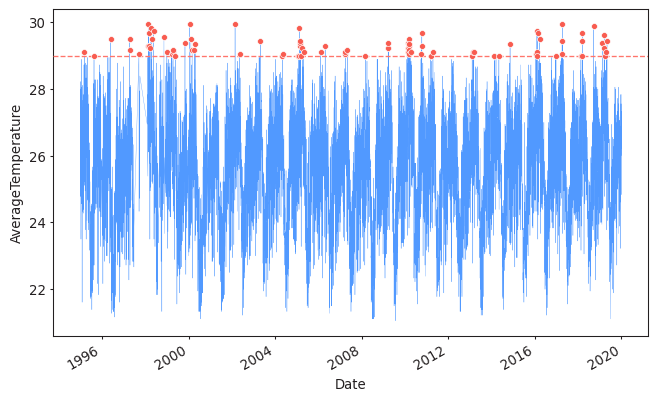

In [ ]:
# Select threshold (adjust according to plot). Not too high or too low (to extract enough extreme values)
print('POT extraction for Congo')
threshold = 29
r = "12H"
extremes = get_extremes(
    ts=data_2,
    method="POT",
    threshold=threshold,
    r=r,
)
fig, ax = plot_extremes(
    ts=data_2,
    extremes=extremes,
    extremes_method="POT",
    extremes_type="high",
    threshold=threshold,
    r=r,
    figsize=(8, 5),
)
fig.autofmt_xdate()
fig.savefig("pot-high-12H.png", dpi=96, bbox_inches="tight")

POT extraction for Gabon


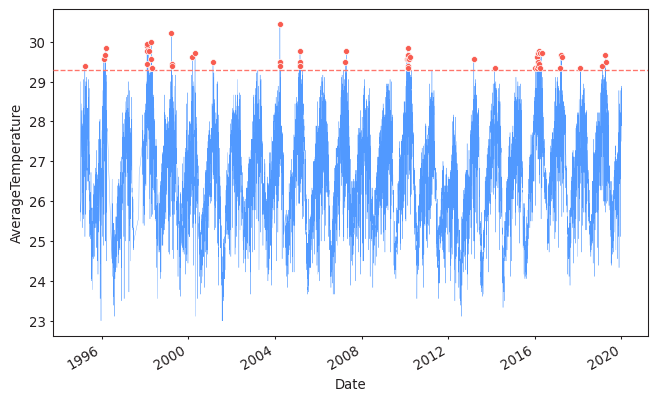

In [ ]:
# select threshold (adjust according to plot). Not too high or too low (to extract enough extreme values)
print('POT extraction for Gabon')

threshold = 29.3
r = "12H"
extremes = get_extremes(
    ts=data_3,
    method="POT",
    threshold=threshold,
    r=r,
)
fig, ax = plot_extremes(
    ts=data_3,
    extremes=extremes,
    extremes_method="POT",
    extremes_type="high",
    threshold=threshold,
    r=r,
    figsize=(8, 5),
)
fig.autofmt_xdate()
fig.savefig("pot-high-12H.png", dpi=96, bbox_inches="tight")

### Diagnostic Plots

#### Nigeria

#### Mean Residual Life Plot



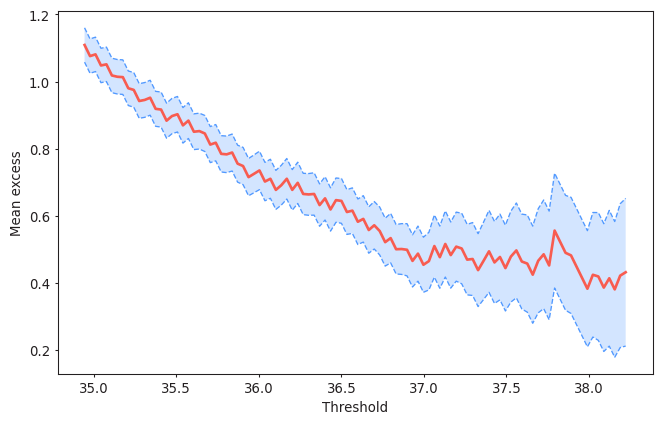

In [ ]:
ax = plot_mean_residual_life(data_1)
fig = ax.get_figure()
fig.savefig("mean-residual-life-high.png", dpi=96, bbox_inches="tight")

Mean residual life plots are notoriously hard to interpret. Threshold selection should never be based soleley on this plot and considerable amount of experience is required to develop intuition required to read such plots. The plot above indicates that the region of thresholds where the linearity condition is approximately met appears to lie in the 37 to 38 range.

#### Parameter Stability Plot

The parameter stability plot shows shape and modified scale parameters of the Generalized Pareto Distribution (GPD). Both shape and modified scale parameters should be approximately constant above a threshold for which the GPD model is valid. The strategy is to select the smallest (largest for extremes_type="low") threshold value immediately above (below for extremes_type="low") which the GPD parameters are approximately constant.

In [ ]:
# help(pyextremes.plot_parameter_stability)

calculating stability parameters: 100%|██████████| 100/100 [00:47<00:00,  2.11it/s]


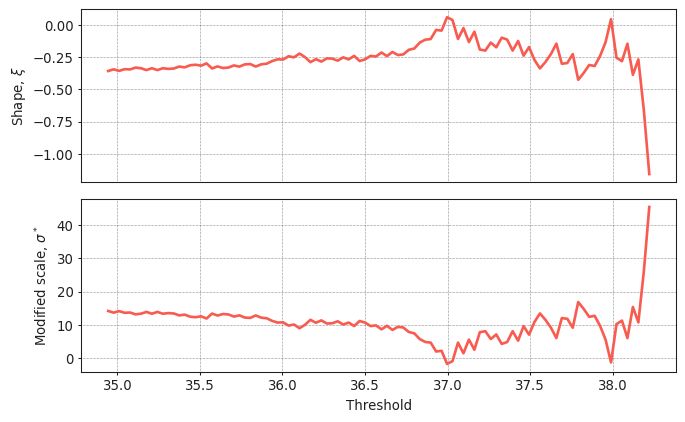

In [ ]:
ax_shape, ax_scale = plot_parameter_stability(data_1, alpha=None, progress=True)
fig = ax_shape.get_figure()
fig.savefig("parameter-stability.png", dpi=96, bbox_inches="tight")

The parameter stability plot shown above indicates the distribution gets unstable after threshold value of 38, which indicates that threshold higher than 38 do not provide sufficient number of exceedances. The region of stability appears to be confined in the 37 to 38 range of threshold values.

#### Plot Threshold Stability

**pyextremes** provides a convenience function to put all of the above together. It also adds an additional plot - AIC curve indicating relative model performance. The AIC curve should not be used as a threshold selection tool because it will always have the same logarithmic shape. Instead, it should guide the user as to which model (e.g. GEVD or Exponential) should be preferred for a given threshold

calculating return values: 100%|██████████| 40/40 [00:07<00:00,  5.45it/s]


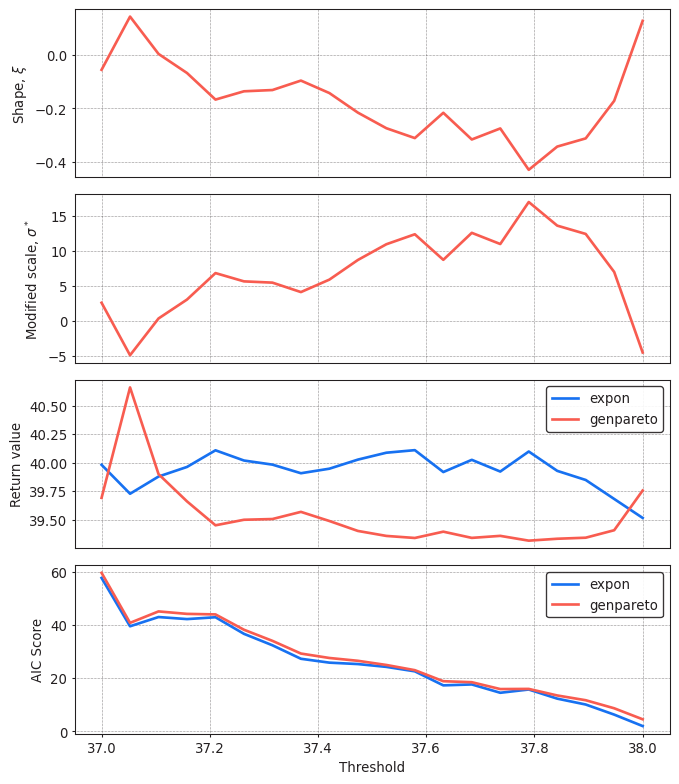

In [ ]:
axes = plot_threshold_stability(data_1, return_period=100, thresholds=np.linspace(37, 38, 20), progress=True)
fig = axes[0].get_figure()
fig.savefig("threshold-stability.png", dpi=96, bbox_inches="tight")

The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables. According to the AIC metric, the optimum theshold would be between 37.8 and 38. Lower AIC values indicate a better-fit model.


#### Use Selected Threshold

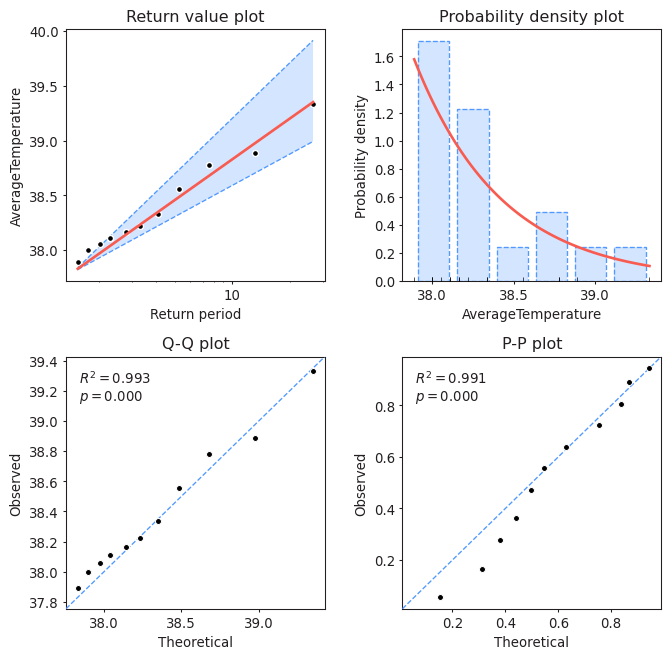

In [ ]:
model = EVA(data_1)
model.get_extremes("POT", threshold=37.8)
model.fit_model()
fig, ax = model.plot_diagnostic(alpha=0.95)
fig.savefig("selected-threshold-diagnostic.png", dpi=96, bbox_inches="tight")

c:\Users\Mohamed Abubakar\anaconda3\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning:

invalid value encountered in subtract



(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Return period', ylabel='AverageTemperature'>)

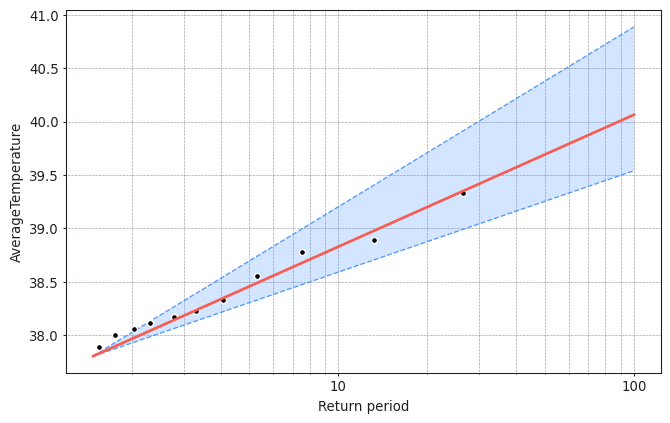

In [ ]:
model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

In [ ]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
summary

c:\Users\Mohamed Abubakar\anaconda3\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning:

invalid value encountered in subtract



,return value,lower ci,upper ci
return period,,,
1.0,-inf,NaN,NaN
2.0,37.965059,37.912787,38.019367
5.0,38.456742,38.248760,38.672823
10.0,38.828686,38.502914,39.167143
25.0,39.320368,38.838888,39.820599
50.0,39.692312,39.093042,40.314920
100.0,40.064256,39.347195,40.809240
250.0,40.555939,39.683169,41.462696
500.0,40.927882,39.937323,41.957017


#### Congo

#### Mean residual-life plot

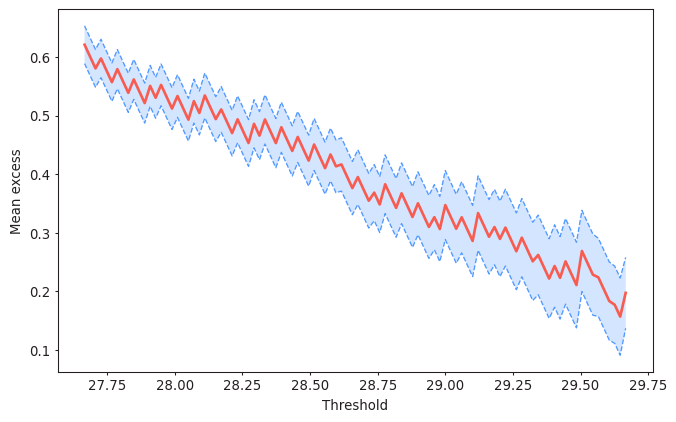

In [ ]:
ax = plot_mean_residual_life(data_2)
fig = ax.get_figure()
fig.savefig("mean-residual-life-high.png", dpi=96, bbox_inches="tight")

The parameter stability plot shown above indicates the distribution gets unstable after threshold value of 29.5, which indicates that threshold higher than 29.5 do not provide sufficient number of exceedances. Let's use other dignostic plots to select the optimum threshold

#### Parameter Stability Plot

calculating stability parameters: 100%|██████████| 100/100 [00:12<00:00,  7.78it/s]


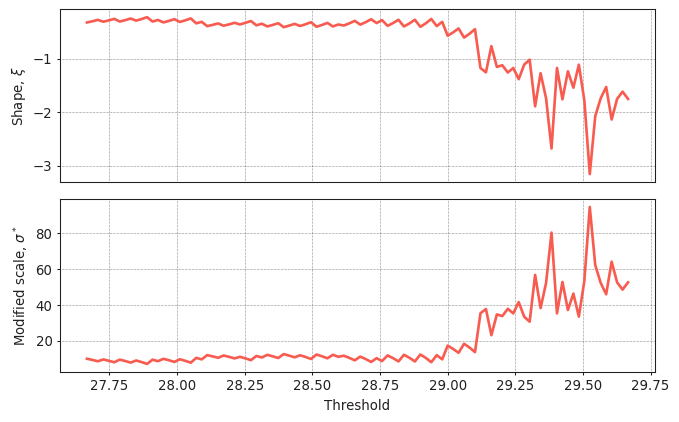

In [ ]:
ax_shape, ax_scale = plot_parameter_stability(data_2, alpha=None, progress=True)
fig = ax_shape.get_figure()
fig.savefig("parameter-stability.png", dpi=96, bbox_inches="tight")

#### Plot Threshold Stability

calculating return values: 100%|██████████| 40/40 [00:05<00:00,  6.79it/s]


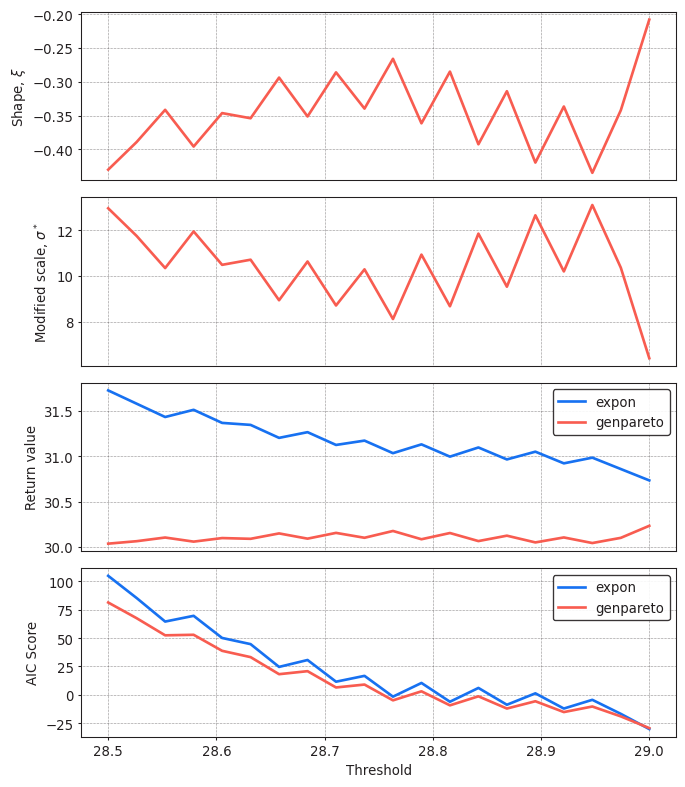

In [ ]:
axes = plot_threshold_stability(data_2, return_period=100, thresholds=np.linspace(28.5, 29, 20), progress=True)
fig = axes[0].get_figure()
fig.savefig("threshold-stability.png", dpi=96, bbox_inches="tight")

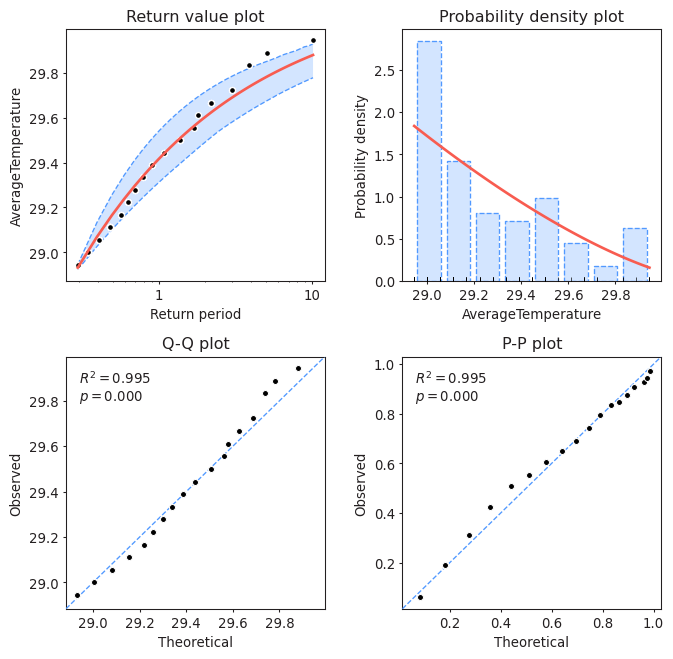

In [ ]:
# selected threshold of 28.9 from the plot above

model = EVA(data_2)
model.get_extremes("POT", threshold=28.9)
model.fit_model()
fig, ax = model.plot_diagnostic(alpha=0.95)
fig.savefig("selected-threshold-diagnostic.png", dpi=96, bbox_inches="tight")

In [ ]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
summary

,return value,lower ci,upper ci
return period,,,
1.0,29.416719,29.306014,29.540241
2.0,29.602769,29.483515,29.713688
5.0,29.780800,29.664226,29.850790
10.0,29.877811,29.773593,29.935976
25.0,29.970640,29.865022,30.067564
50.0,30.021224,29.912811,30.160630
100.0,30.059437,29.942813,30.248609
250.0,30.096002,29.960348,30.337801
500.0,30.115927,29.969055,30.400771


### Conclusion

This study analyzed monthly maximum temperatures from January 1980 to December 2016 using two extreme value distribution models. Stationarity tests confirmed that the data had no trend, ensuring the validity of the subsequent analysis. The **Block Maxima** approach was employed to fit the **Generalized Extreme Value (GEV) Distribution**, while the **Peak Over Threshold (POT)** method was used for the **Generalized Pareto Distribution (GPD)**. Among the two models, the GEV model was determined to be more suitable based on diagnostic plots, model stability checks, and model comparison techniques.

#### Key Findings
- **Return Levels**:
  - The return level estimates revealed that temperatures are rising and could reach dangerous levels in the future.
  - For example, the return level estimate for Nigeria indicated that temperatures exceeding the observed maximum of **40.06°C** are likely to occur starting at **T = 100 years**.
- **Practical Implications**:
  - This study provides decision-makers across Africa with critical insights into extreme temperature events over specific return periods. Such information is invaluable for developing preparedness and adaptation strategies.
  - As climate change continues to impact the region, resilience measures for communities, such as those in Kenya, are crucial for mitigating the adverse effects of extreme temperatures.

#### Contributions
This study demonstrates the utility of **Extreme Value Theory (EVT)** in modeling and understanding extreme temperature events. The application of the GEV and GPD models highlights how EVT can support climate analysis and decision-making. While this paper focused on temperature extremes, it opens opportunities for extending EVT applications in Africa and beyond.

#### Recommendations
1. **Future Research**:
   - Model both extreme rainfall and temperature events in Africa with respect to specific regions for a comprehensive analysis.
   - Extend the study to other regions globally to assess the broader impact of climate change and devise mitigation measures.
2. **Advanced Techniques**:
   - Consider employing advanced EVT methodologies, such as Bayesian approaches or extreme quantiles, to deepen the understanding of temperature extremes in Africa.
3. **Policy and Adaptation**:
   - Encourage policymakers to integrate these findings into long-term climate adaptation and mitigation plans, ensuring proactive responses to the challenges posed by extreme temperatures.

By leveraging EVT, this study provides a robust framework for analyzing and forecasting extreme climate events, contributing valuable insights to the ongoing efforts to combat the effects of climate change in Africa and beyond.


### Reference

De Haan, L., & Ferreira, A. (2007). Extreme value theory: an introduction. Springer Science & Business Media.  

Hasan, H., Radi, N. A., & Kassim, S. (2012, July). Modeling of extreme temperature using generalized extreme value (GEV) distribution: A case study of Penang. In World Congress on Engineering (Vol. 1, No. 2012, pp. 181-186).

Hasan, H., Salam, N., & Kassim, S. (2013, April). Modeling annual extreme temperature using generalized extreme value distribution: A case study in Malaysia. In AIP Conference Proceedings (Vol. 1522, No. 1, pp. 1195-1203). American Institute of Physics.

Kunkel, K.E., R.A. Pielke Jr., and S.A. Changnon, 1999: Temporal fluctuations in weather and climate extremes that cause economic and human health impacts: a review. Bull. Amer. Meteor. Soc., 80, 1077–1098.  

Matimolane, S. W. (2018). Impacts of Climate Variability and Change on Maize (Zea may) production   in Makhuduthamaga Local Municipality, Limpopo Province, South Africa (Doctoral dissertation).  

Segers, J. (2005). Generalized Pickands estimators for the extreme value index. Journal of Statistical Planning and Inference, 128 (2), 381-396.  

Wambua, M. M., Mung’atu, J. K., & Aduda, J. A. (2020). Modelling extreme temperature using extreme value theory: a case study Northern Kenya. Int J Data Sci Anal, 6(5), 130-136.

Zheng, S. (2022) Extreme value theory – block Maxima and peak-over-threshold, SimTrade blog. Available at: https://www.simtrade.fr/blog_simtrade/extreme-value-theory-block-maxima-peak-threshold/ (Accessed: October 18, 2022).  [Original source: https://studycrumb.com/alphabetizer]